# Exploratoy Data Analysis-Retail

# Author: Rohan Kudtarkar

# Task 3 

In [1]:
# Importing libraries and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading data
data = pd.read_csv("SampleSuperstore.csv")
data.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
data.shape

(9994, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 702.8+ KB


In [5]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
#States names
data.State.unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [7]:
#Region names
data.Region.unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [8]:
#Shipping Modes
data['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [9]:
data.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [10]:
data['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

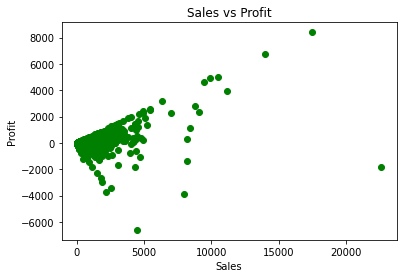

In [11]:
plt.scatter(data.Sales,data.Profit,color='green')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales vs Profit')
plt.show()

we need to make a new column in the dataset from above graph.

In [12]:
PL = pd.Series([],dtype=pd.StringDtype())
for i in range(len(data)):
    if data['Profit'][i] > 0:
        PL[i] = 'Profit'
    else:
        PL[i] = 'Loss'

data.insert(loc=11 ,column='PL' ,value=PL)

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PL', ylabel='count'>

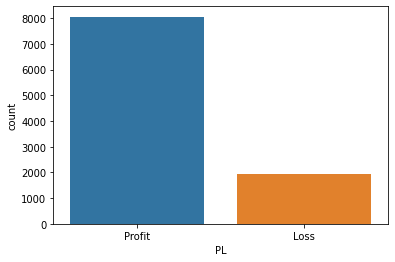

In [13]:
sns.countplot('PL', data=data)

# Profit-Loss barplot for Category

Check Which category of product is giving us more profit and which category giving us more loss?

<AxesSubplot:xlabel='PL', ylabel='Sales'>

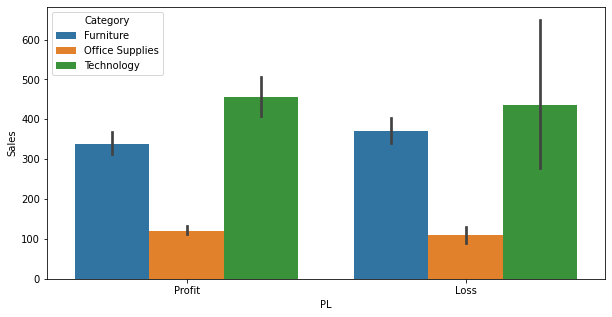

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(x='PL', y='Sales', data=data, hue='Category')

We can infer from the above plot,
* technology products can give us huge profit as well as huge losses at times.
* for office supplies, the profit is lower but the loss is also very low that means the risk of doing business is less,
* Furniture products have a bit higher loss number than profit.

# Profit-Loss barplot for Sub-Category

<AxesSubplot:xlabel='PL', ylabel='Sales'>

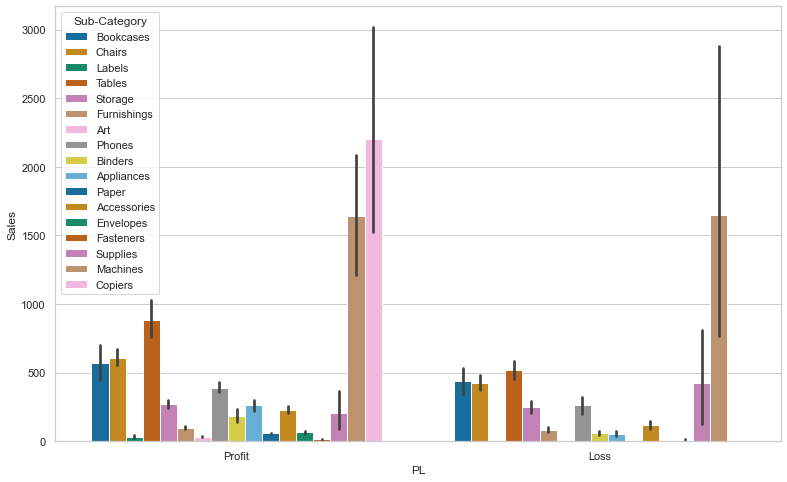

In [15]:
plt.figure(figsize=(13,8))
sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("colorblind", len(data))
sns.barplot(x='PL', y = 'Sales', data = data, palette = pal, hue='Sub-Category')

# Discount effect on Profit and Sales of Product

<AxesSubplot:xlabel='Discount', ylabel='Sales'>

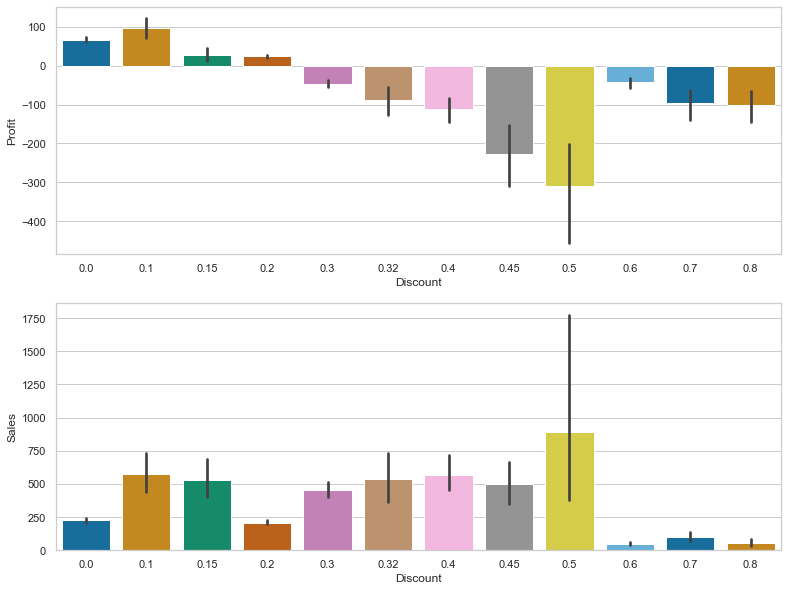

In [16]:
plt.figure(figsize=(13,10))

pal = sns.color_palette("colorblind", len(data))
plt.subplot(2,1,1)
sns.barplot(x='Discount', y='Profit', palette = pal, data=data)

plt.subplot(2,1,2)
sns.barplot(x='Discount', y='Sales', palette = pal, data=data)

We can see the profit is lower when high discount is placed on the other hand discount increases Sales.

# Profits by Region and States

<AxesSubplot:xlabel='Region', ylabel='Profit'>

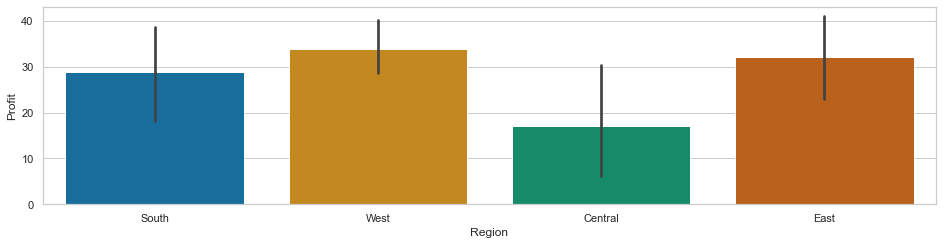

In [17]:
#Profits by Region and States
plt.figure(figsize=(16,8))

pal = sns.color_palette("colorblind", len(data))
plt.subplot(2,1,1)
sns.barplot(x='Region', y='Profit', palette = pal, data=data)

We can see, the shops of west region makes the highest profit and the shops of east comes after that. The company needs to focus on the profit of Central region shops as its number is very low.

<AxesSubplot:xlabel='State', ylabel='Profit'>

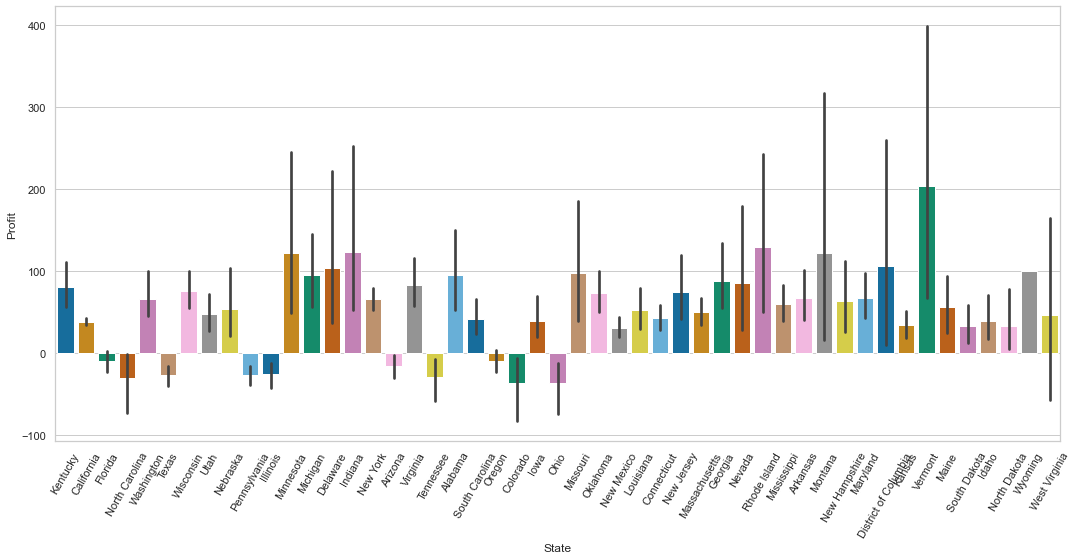

In [18]:
plt.figure(figsize=(18,8))

pal = sns.color_palette("colorblind", len(data))
plt.xticks(rotation=60)
sns.barplot(x='State', y='Profit', palette = pal, data=data)

We can see around 10 states arein losses and others are gaining profits.

# Most used shipping mode

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

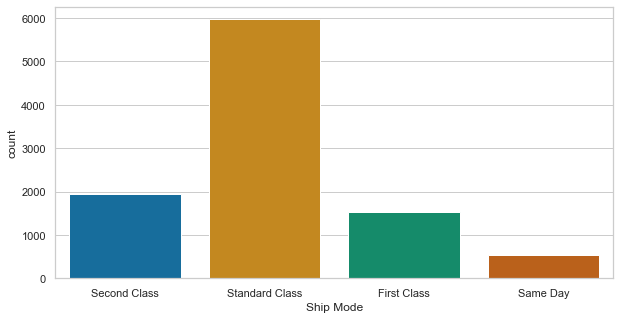

In [19]:
plt.figure(figsize=(10,5))

pal = sns.color_palette("colorblind", len(data))

sns.countplot('Ship Mode', palette = pal, data=data)

Standard class is the most popular shipping mode.

# Most popular segment

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Segment', ylabel='count'>

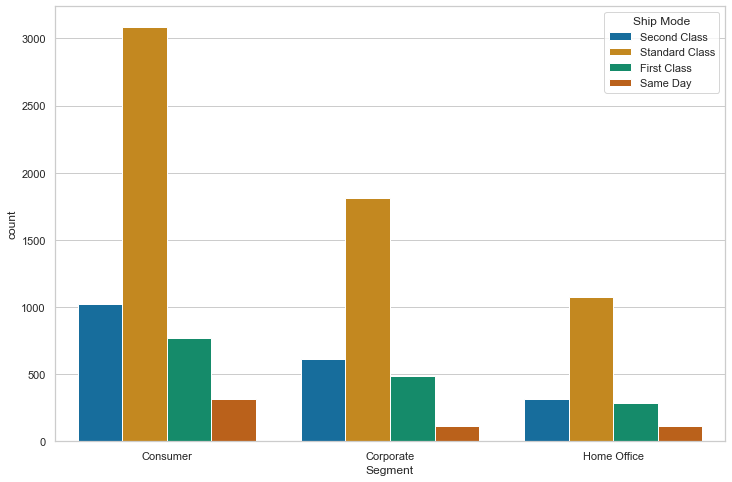

In [20]:
plt.figure(figsize=(12,8))

pal = sns.color_palette("colorblind", len(data))

sns.countplot('Segment', palette = pal, data=data, hue = 'Ship Mode')

We can infer from the above graph, standard class is popular for all the segment as second class is also quite used one.

In [21]:
# Profit_Ratio = pd.Series([],dtype=pd.StringDtype())
# for i in range(len(data)):
#     Profit_Ratio[i] = np.sum(data['Profit'][i]) / np.sum(data['Sales'][i])